# Perceptron

## Parse Dataset

In [5]:
dataset1 = open('/Users/jonas/Desktop/projects/theano_tut/hinton_course/Assignment1/Datasets/dataset3_ancient_octave.mat', 'r')
content = dataset1.read()
dataset1.close()

objects = {}
for line in iter(content.splitlines()):
    if '# Created' in line:
        pass
    elif '# name: ' in line:
        current_object = {}
        objects[line[8:]] = current_object
        current_object['items'] = []
    elif '# type: ' in line:
        current_object['type'] = line[8:]
    elif '# rows: ' in line:
        current_object['rows'] = line[8:]
    elif '# columns: ' in line:
        current_object['columns'] = line[11:]
    else:
        item = line.split(' ')[1:]
        if len(item) > 0:
            current_object['items'].append(item)


## Perceptron Algorithm

In [6]:
weights = [float(x[0]) for x in objects['w_init']['items']]
gfwv = [float(x[0]) for x in objects['w_gen_feas']['items']]

gfwv_given = False
if gfwv != []:
    gfwv_given = True

items_neg = objects['neg_examples_nobias']['items']
x_neg = [float(point[0]) for point in items_neg]
y_neg = [float(point[1]) for point in items_neg]

items_pos = objects['pos_examples_nobias']['items']
x_pos = [float(point[0]) for point in items_pos]
y_pos = [float(point[1]) for point in items_pos]

bias = weights[2]

def classify():
    labels_neg = []
    errors = 0

    for i in range(len(x_neg)):
        sum = bias + x_neg[i] * weights[0] + y_neg[i] * weights[1]
        if sum >= 0:
            labels_neg.append('neg')
        else:
            labels_neg.append('pos')
            errors += 1
     
    labels_pos = []
    
    for i in range(len(x_pos)):
        sum = bias + x_pos[i] * weights[0] + y_pos[i] * weights[1]
        if sum >= 0:
            labels_pos.append('neg')
            errors += 1
        else:
            labels_pos.append('pos')
    
    return errors, labels_neg, labels_pos

## Plot data

In [7]:
def get_neg_points_neg(labels_neg, labels_pos):
    neg_points_neg_x = []
    neg_points_neg_y = []
    for i in range(len(x_neg)):
        if labels_neg[i] == 'neg':
            neg_points_neg_x.append(x_neg[i])
            neg_points_neg_y.append(y_neg[i])
    return [neg_points_neg_x, neg_points_neg_y]
    
def get_neg_points_pos(labels_neg, labels_pos):
    neg_points_pos_x = []
    neg_points_pos_y = []
    for i in range(len(x_neg)):
        if labels_neg[i] == 'pos':
            neg_points_pos_x.append(x_neg[i])
            neg_points_pos_y.append(y_neg[i])
    return [neg_points_pos_x, neg_points_pos_y]
   
def get_pos_points_neg(labels_neg, labels_pos):
    pos_points_neg_x = []
    pos_points_neg_y = []
    for i in range(len(x_pos)):
        if labels_pos[i] == 'neg':
            pos_points_neg_x.append(x_pos[i])
            pos_points_neg_y.append(y_pos[i])
    return [pos_points_neg_x, pos_points_neg_y]
    
def get_pos_points_pos(labels_neg, labels_pos):
    pos_points_pos_x = []
    pos_points_pos_y = []
    for i in range(len(x_pos)):
        if labels_pos[i] == 'pos':
            pos_points_pos_x.append(x_pos[i])
            pos_points_pos_y.append(y_pos[i])
    return [pos_points_pos_x, pos_points_pos_y]

def update_weights(labels_neg, labels_pos):
    for i in range(len(x_neg)):
        if labels_neg[i] == 'pos':
            weights[0] += x_neg[i]
            weights[1] += y_neg[i]
            
    for i in range(len(x_pos)):
        if labels_pos[i] == 'neg':
            weights[0] -= x_pos[i]
            weights[1] -= y_pos[i]
            
def calculate_distance_to_gfwv():
    return math.fabs(weights[0] - gfwv[0] + weights[1] - gfwv[1])


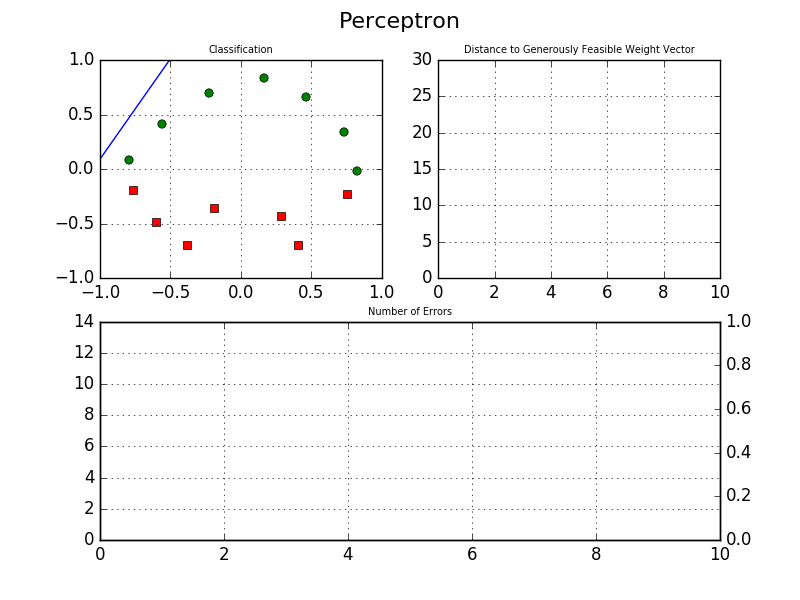
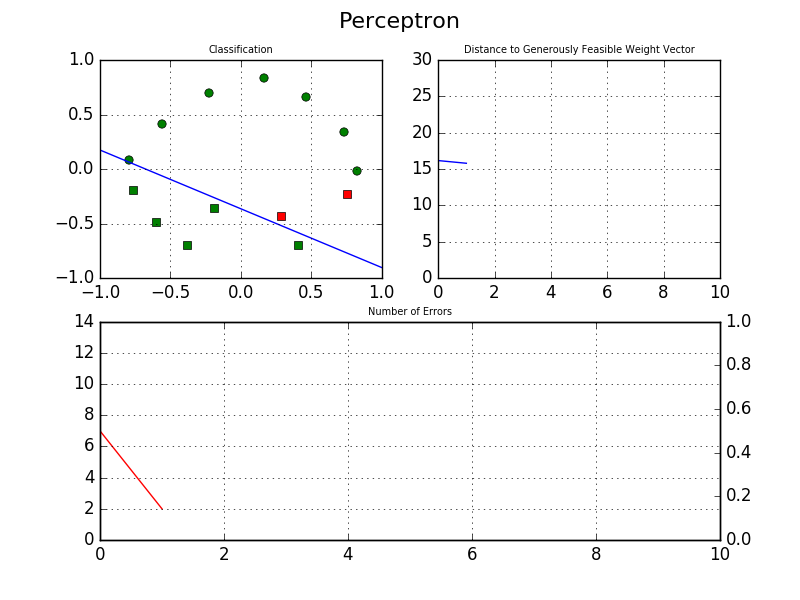
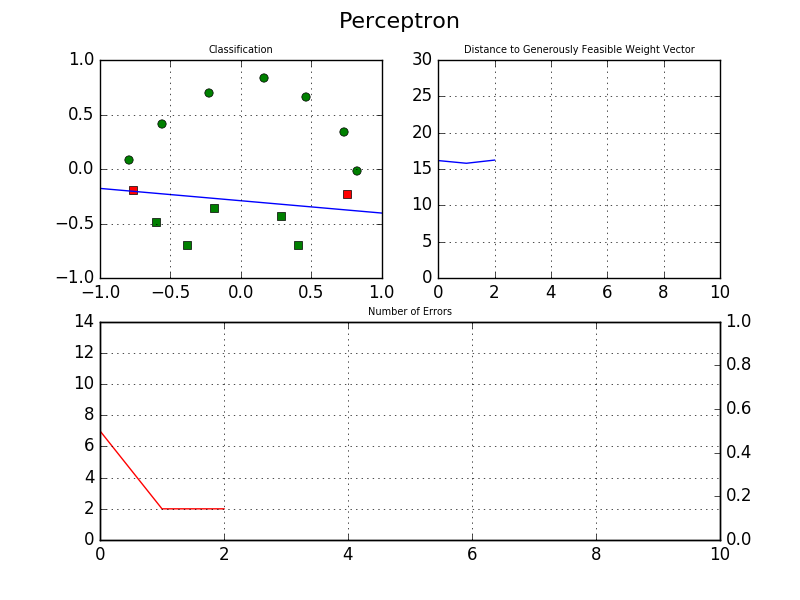
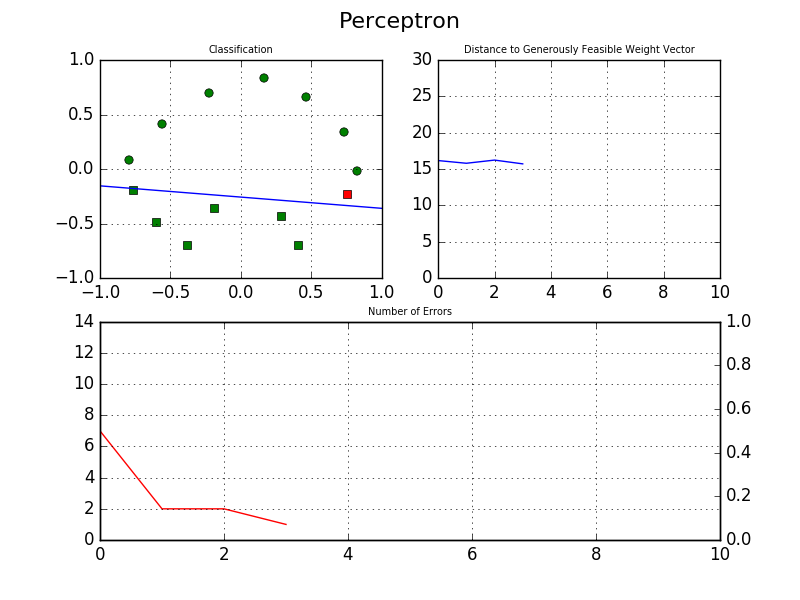
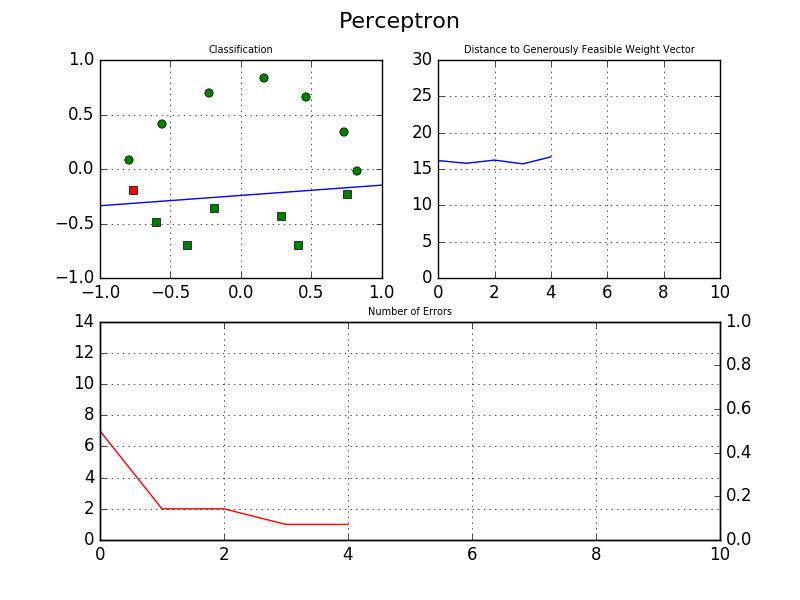
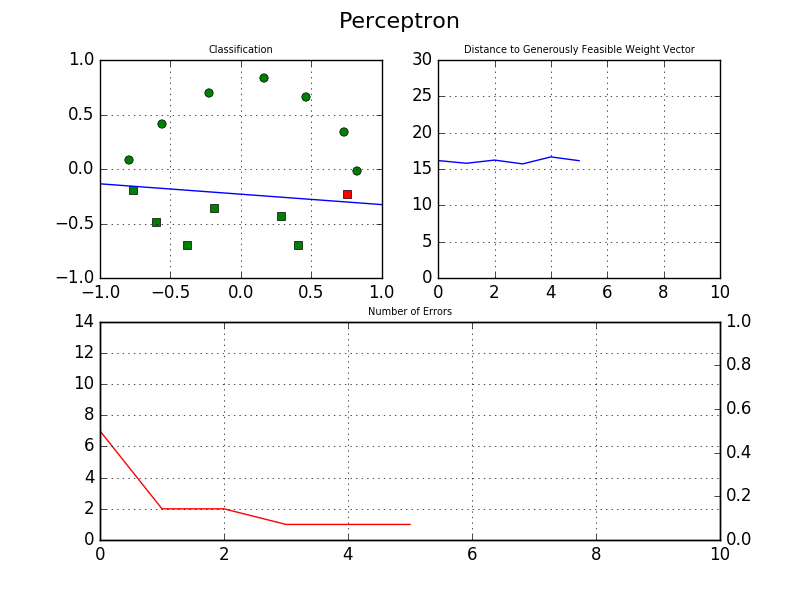
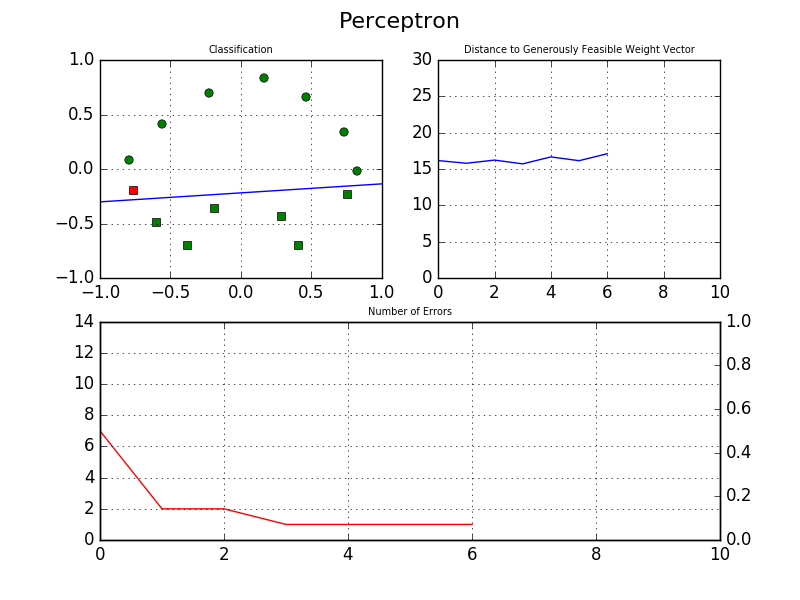
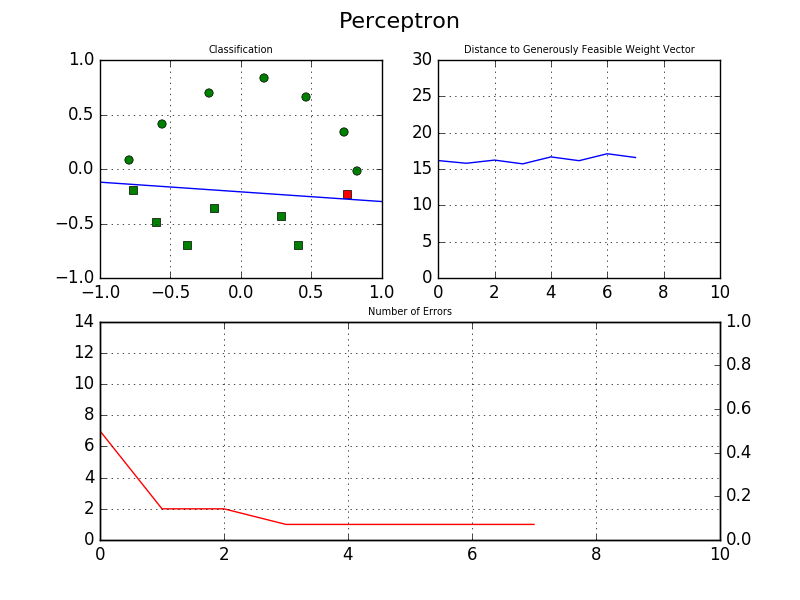
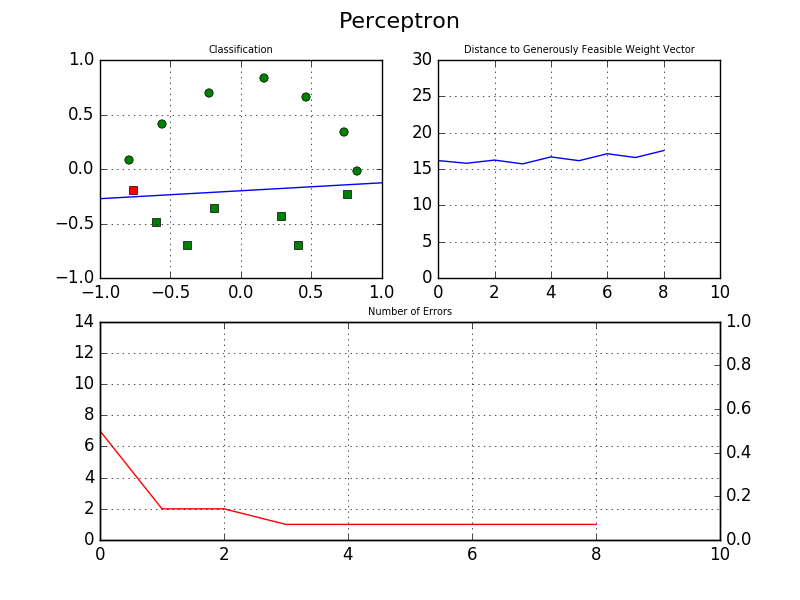
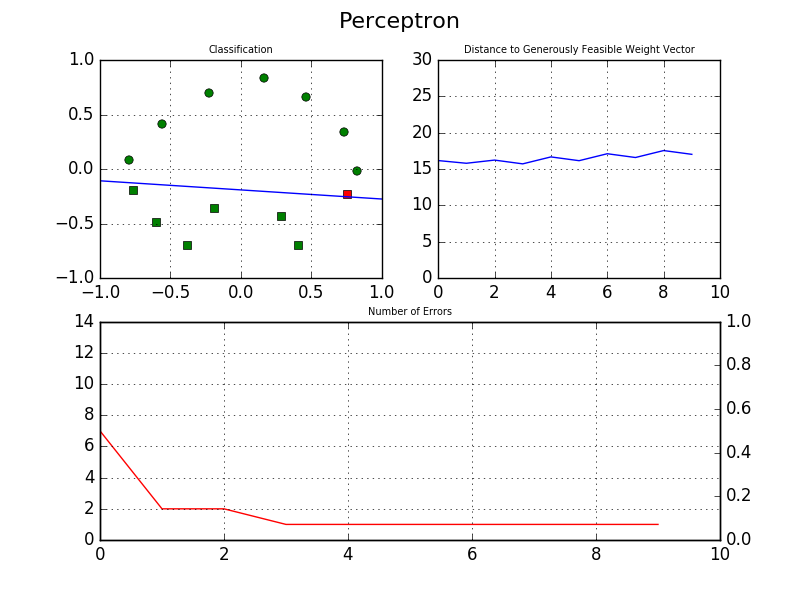
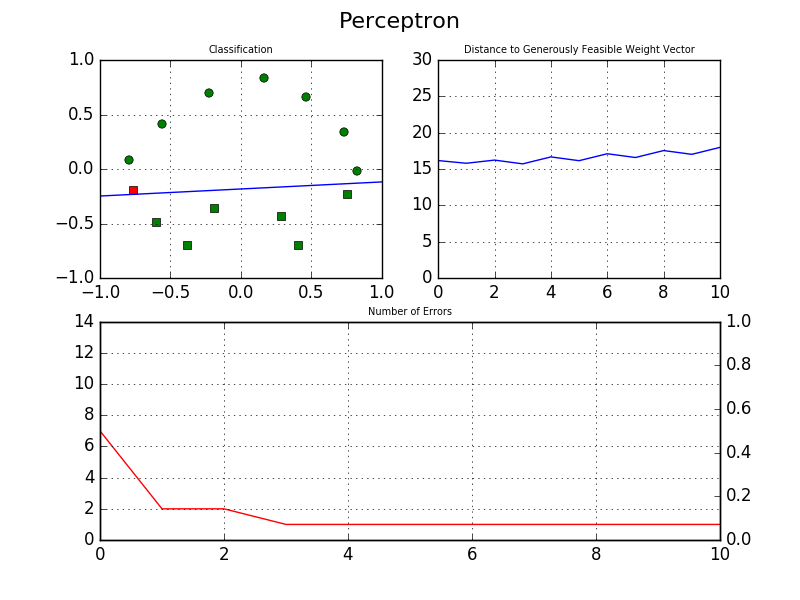
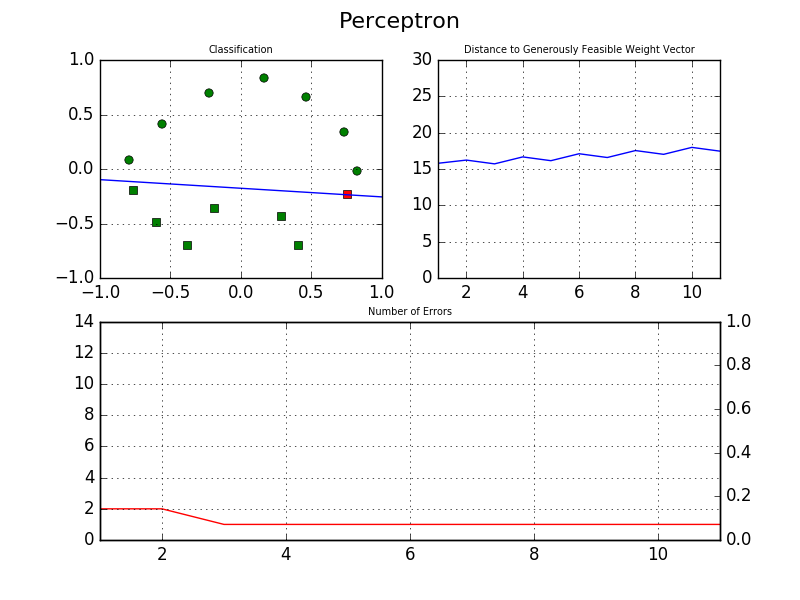
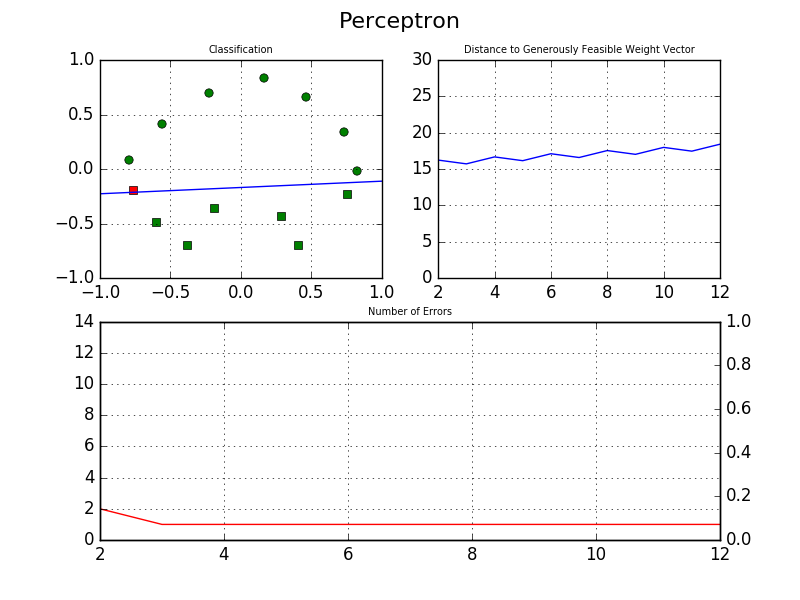
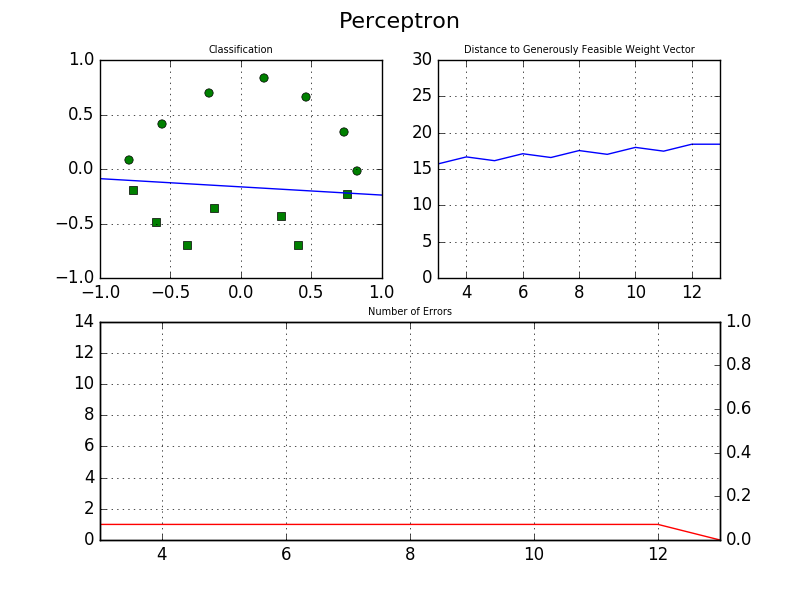
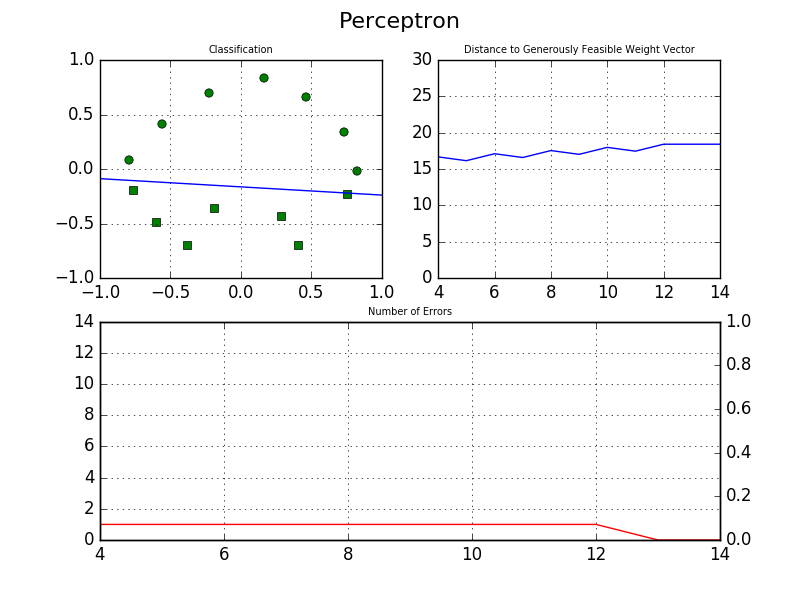
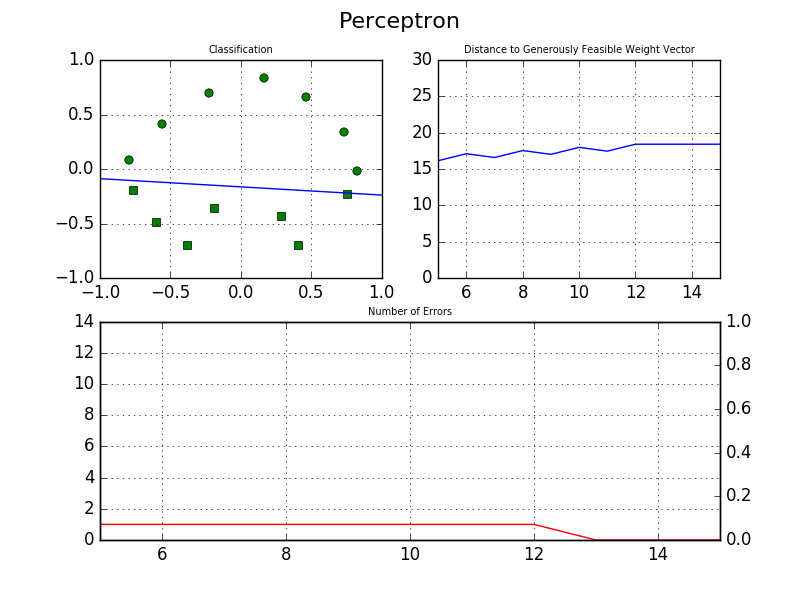
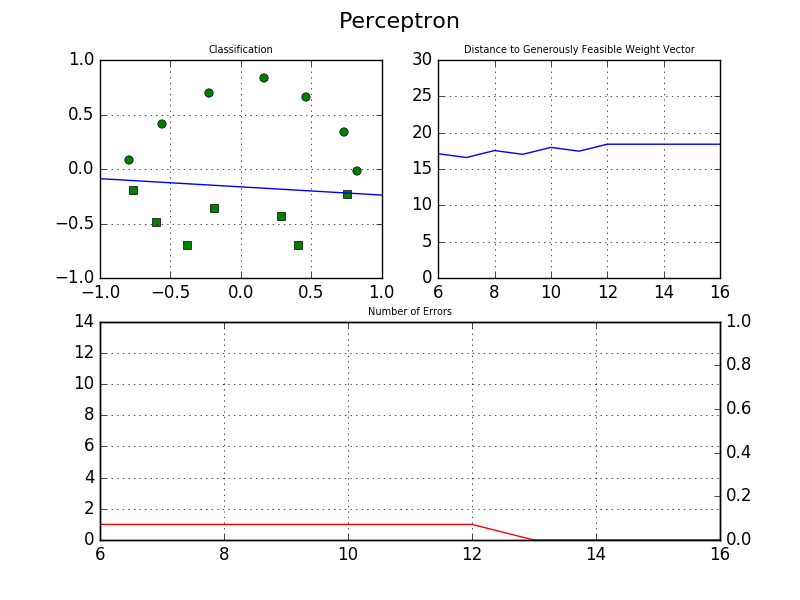
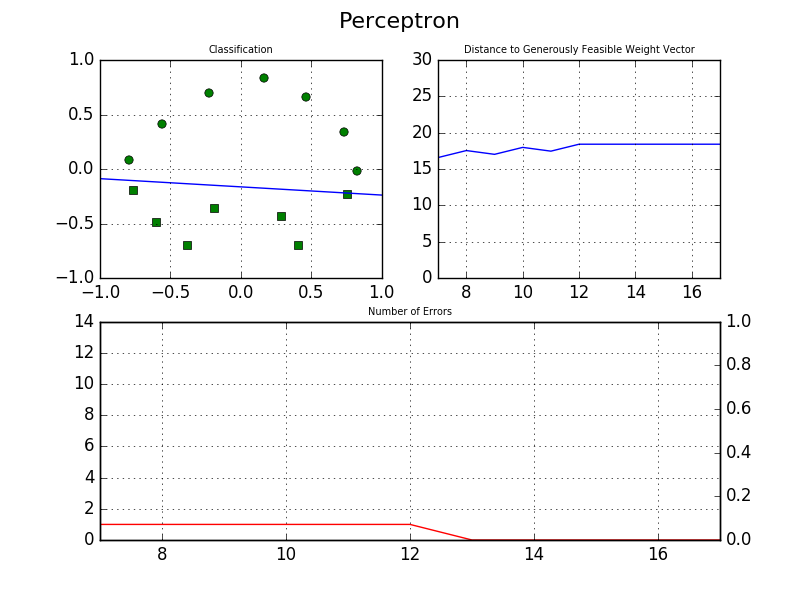
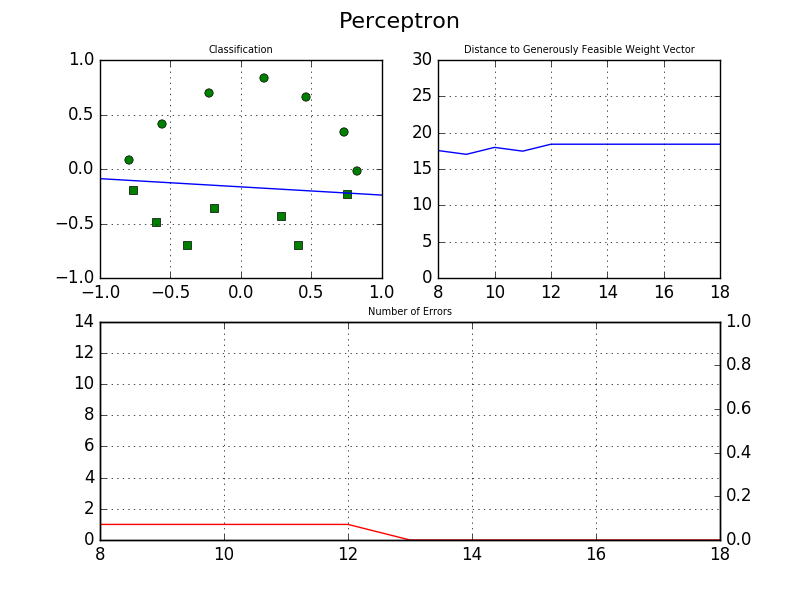
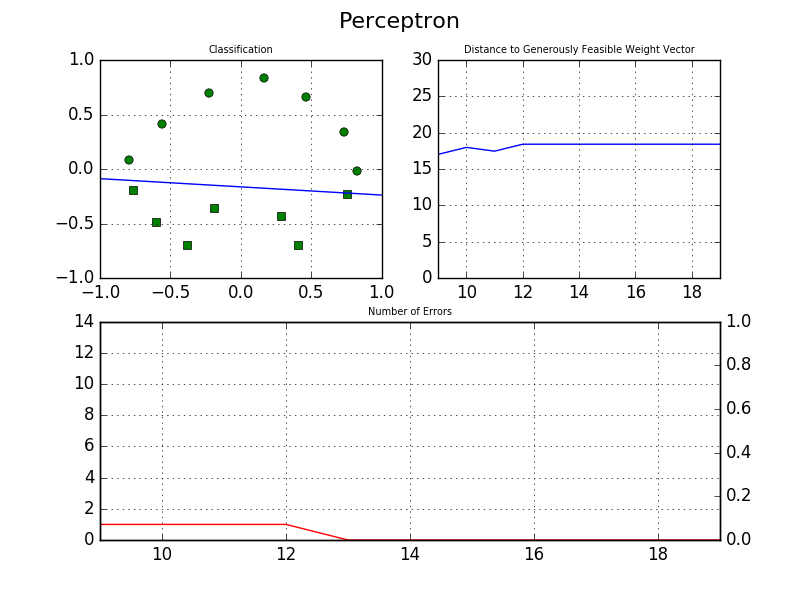
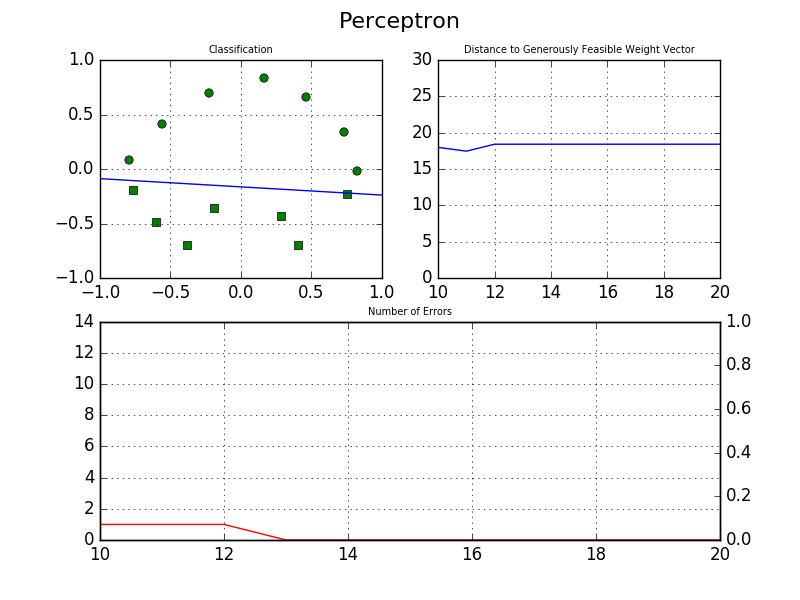
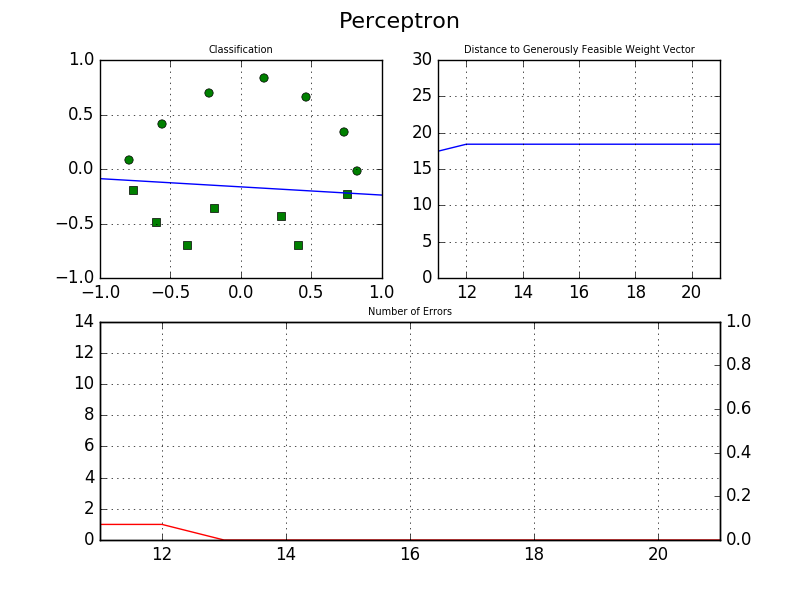
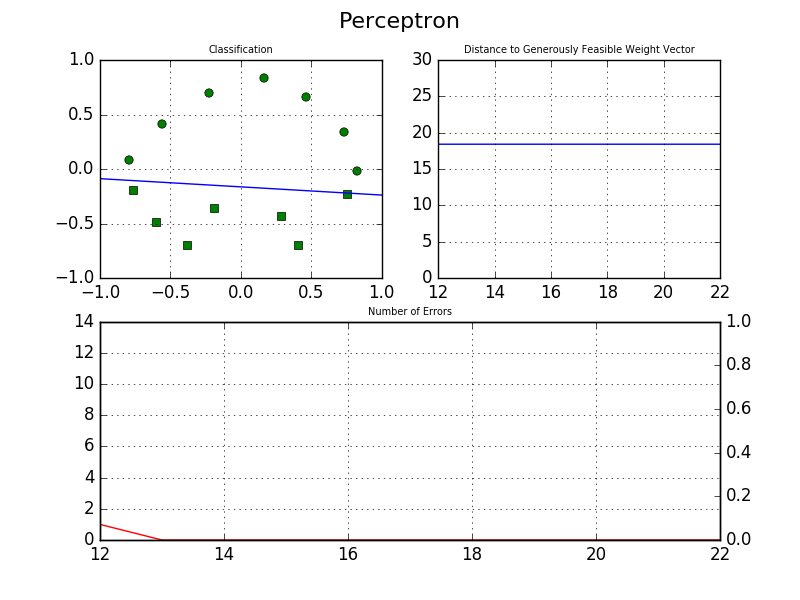
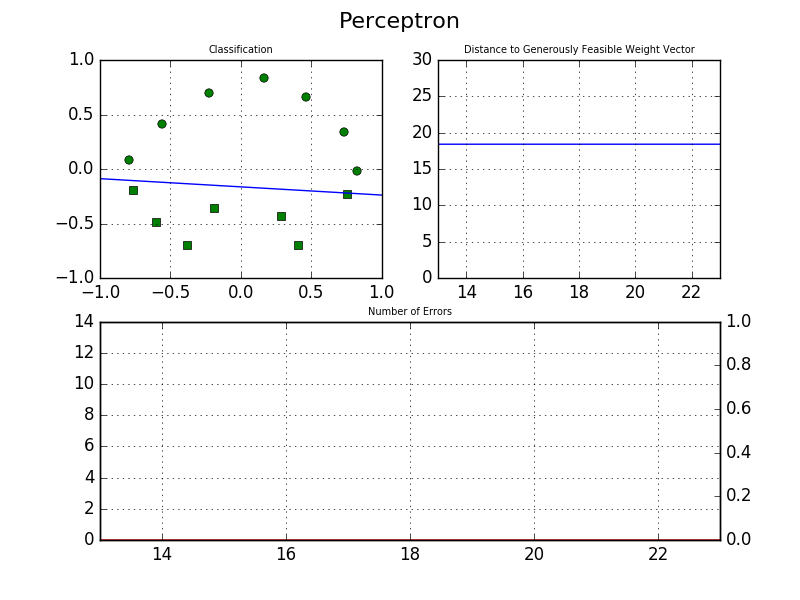
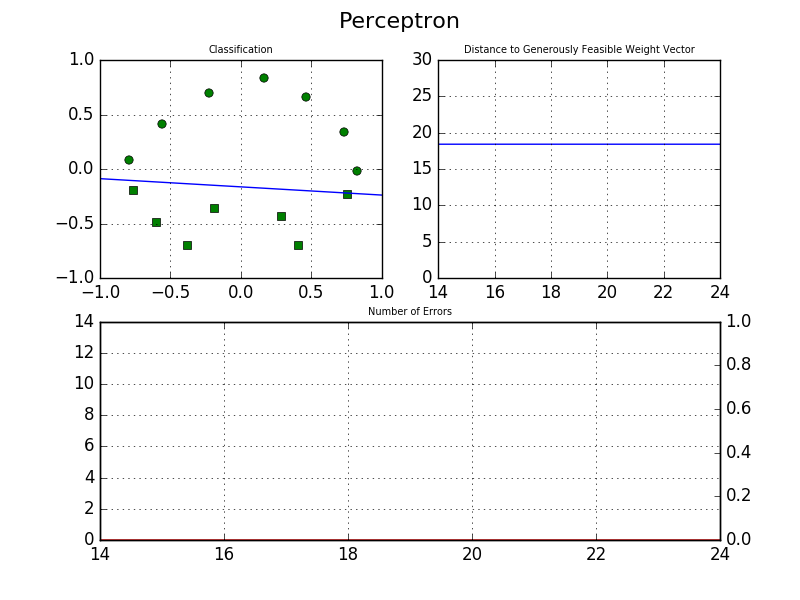
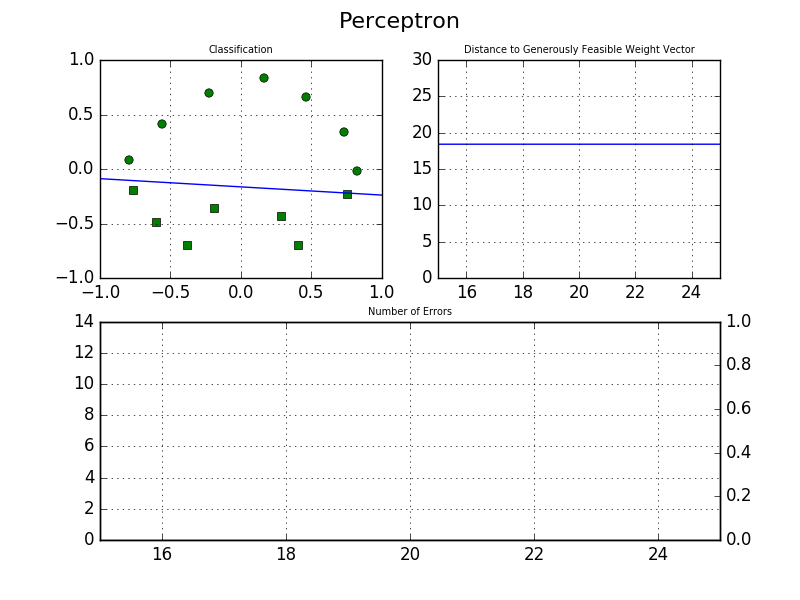
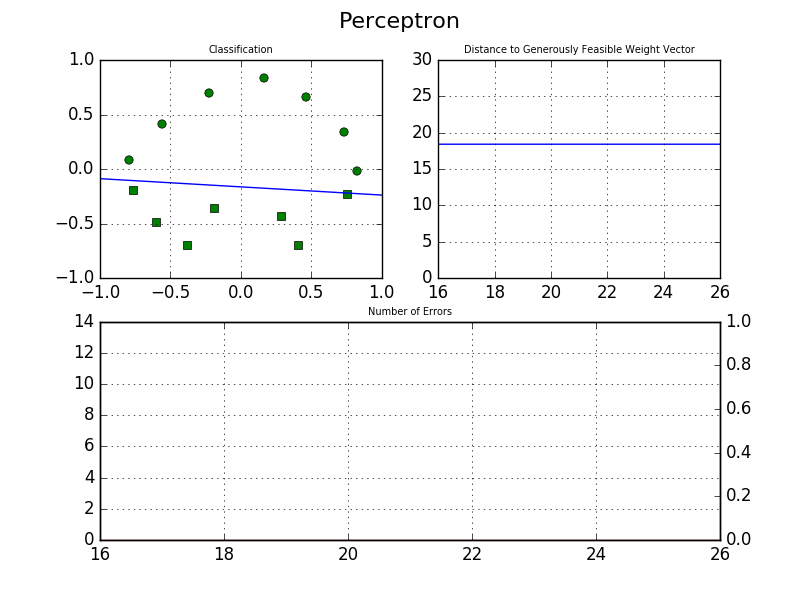
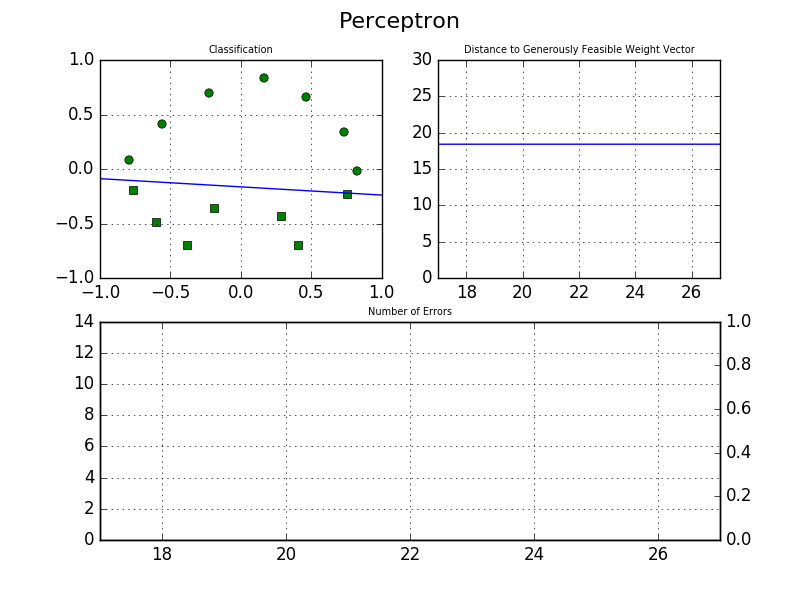
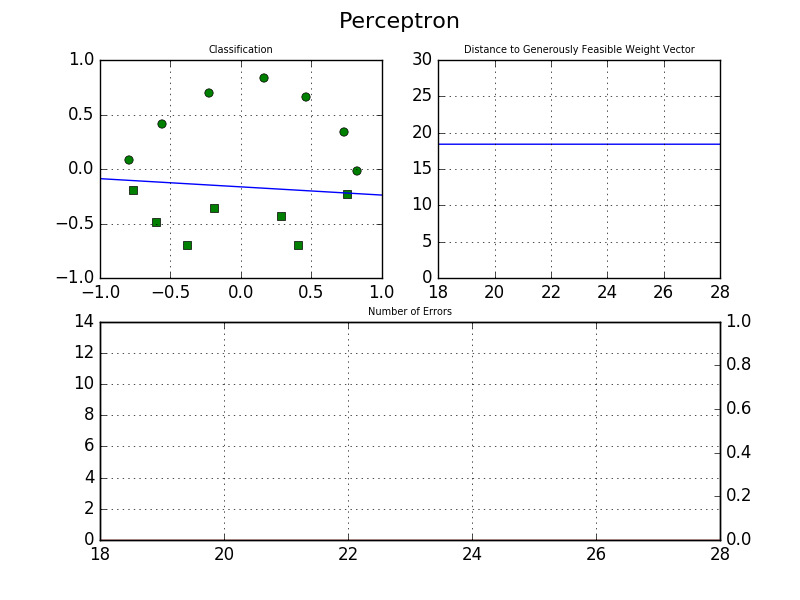
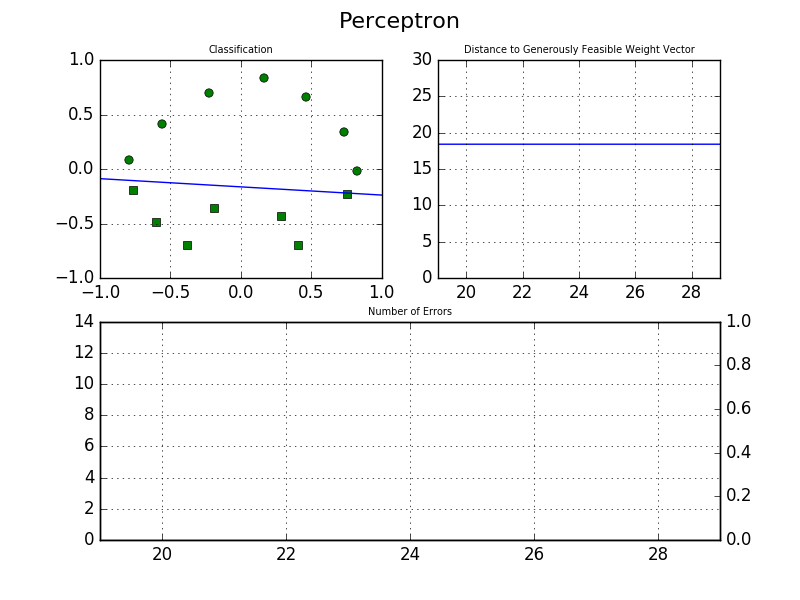

In [8]:
# JSAnimation import available at https://github.com/jakevdp/JSAnimation
from JSAnimation import IPython_display
from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.pylab import *

# create a simple animation
fig = plt.figure()
fig.suptitle('Perceptron', fontsize=16)
ax01 = subplot2grid((2, 2), (0, 0))
ax01.set_xlim(-1,1)
ax01.set_ylim(-1,1)
ax02 = subplot2grid((2, 2), (0, 1))
xmax = 10
ax02.set_xlim(0,xmax)
ax02.set_ylim(0,30)
ax03 = subplot2grid((2, 2), (1, 0), colspan=2, rowspan=1)
ax03.set_xlim(0,xmax)
ax03.set_ylim(0,len(x_pos)+len(x_neg))
ax04 = ax03.twinx()

ax01.grid(True)
ax02.grid(True)
ax03.grid(True)

# Set titles of subplots
ax01.set_title('Classification', fontsize=7)
ax02.set_title('Distance to Generously Feasible Weight Vector', fontsize=7)
ax03.set_title('Number of Errors', fontsize=7)

neg_points_neg, = ax01.plot([], [], 'go')
neg_points_pos, = ax01.plot([], [], 'ro')
pos_points_neg, = ax01.plot([], [], 'rs')
pos_points_pos, = ax01.plot([], [], 'gs')
seperator, = ax01.plot([], [], 'b-')

errors, = ax03.plot([], [], 'r-')

distance_to_gfwv, = ax02.plot([], [], 'b-')

error_history = []
i_history = []
distance_to_gfwv_history = []

def init():
    neg_points_neg.set_data([], [])
    return neg_points_neg,

def animate(i):
    
    # classify
    
    error_count, labels_neg, labels_pos = classify()
    
    # get points
    
    neg_points_neg_data = get_neg_points_neg(labels_neg, labels_pos)
    neg_points_pos_data = get_neg_points_pos(labels_neg, labels_pos)
    pos_points_neg_data = get_pos_points_neg(labels_neg, labels_pos)
    pos_points_pos_data = get_pos_points_pos(labels_neg, labels_pos)
    
    # draw points
    
    neg_points_neg.set_data(neg_points_neg_data)
    neg_points_pos.set_data(neg_points_pos_data)
    pos_points_neg.set_data(pos_points_neg_data)
    pos_points_pos.set_data(pos_points_pos_data)

    # draw seperator
    
    x1 = 2
    y1 = (-x1 * weights[0] - bias) / weights[1]
    
    x2 = -2
    y2 = (-x2 * weights[0] - bias) / weights[1]
    
    seperator.set_data([x1, x2], [y1, y2])
    
    # update weights
    
    update_weights(labels_neg, labels_pos)
    
        
    # draw errors
    error_history.append(error_count)
    i_history.append(i)
    
    if i > xmax:
        errors.axes.set_xlim(i-xmax,i)
    
    errors.set_data(i_history, error_history)
    
    # draw distamce
    if gfwv_given:
        distance_to_gfwv_value = calculate_distance_to_gfwv()
        distance_to_gfwv_history.append(distance_to_gfwv_value)
        
        if i > xmax:
            distance_to_gfwv.axes.set_xlim(i-xmax,i)
        
        distance_to_gfwv.set_data(i_history, distance_to_gfwv_history)
    
    return neg_points_neg, neg_points_pos, pos_points_neg, pos_points_pos, seperator, errors, distance_to_gfwv
    
    

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=30, interval=300, blit=True)